In [50]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

In [51]:
test_dir_name = './data/test/'

In [52]:
# 카테고리 코드 -> 클래스 라벨
cls_idx = {
   '0': 0,
   '1': 1,
   '2': 2,
   '3': 3}

In [53]:
datagen_test = ImageDataGenerator(rescale=1./255)

batch_size = 256

generator_test = datagen_test.flow_from_directory(directory=test_dir_name,
                                                  target_size=(224,224),
                                                  batch_size=batch_size,
                                                  shuffle=False
                                                  )

Found 68 images belonging to 4 classes.


In [54]:
modelPath = './model_saved/abdomen_excoriation/resnet_v2_152_600/'  # 모델이 저장된 경로
weight = 'model-333-0.974085-0.955882.h5'  # 학습된 모델의 파일이름

In [55]:
model = load_model(modelPath + weight)

In [56]:
cls_pred = model.predict_generator(generator_test, steps=1, verbose=1)

1/1 [==============================] - 19s 19s/step


In [57]:
cls_test = generator_test.classes
cls_pred_classes = cls_pred.argsort(axis=1)

In [58]:
len(cls_pred_classes)

68

In [59]:
idx_cls = {v:k for k,v in generator_test.class_indices.items()}

In [60]:
idx_cls

{0: '0', 1: '1', 2: '2', 3: '3'}

In [61]:
# helper function

def path_join(dirname, img_paths):
    return [os.path.join(dirname, img_path) for img_path in img_paths]

def load_images(image_paths):
    images = [plt.imread(path) for path in image_paths]
    return np.asarray(images)

In [62]:
def plot_images(images, cls_true, cls_pred):
    assert len(images) == len(cls_true)
    if len(images) == 0: return

    num_x_plot = int(np.ceil(len(images)/4))
    fig, axes = plt.subplots(num_x_plot , 4 , figsize=(22,len(images)))
    interpolation = 'spline16'
  
    fig.subplots_adjust(hspace=0.6)
  
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i], interpolation=interpolation)
            
            cls_true_name = cls_true[i]
            cls_pred_name = cls_pred[i]

            xlabel = "True:{}, Pred:{}".format(idx_cls[cls_true_name], idx_cls[cls_pred_name])
            ax.set_xlabel(xlabel, fontsize=15.0)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()
    plt.show()

In [63]:
def print_errors():
    generator_test.reset()

    cls_pred_argmax = cls_pred.argmax(axis=1) # 예측 클래스 어래이
    incorrect = (cls_pred_argmax != cls_test) # 틀린 예측 인덱스
    true_incorrect = cls_test[incorrect]
    pred_incorrect = cls_pred_argmax[incorrect]
    
    pred_idx = np.argwhere(incorrect == True).flatten()

    print('예측 틀린 개수:{} / {}'.format(len(pred_idx), len(cls_pred_argmax)))
    
    rdm_idx = np.random.randint(0, len(pred_idx), size=12)
    image_path = np.array(path_join(test_dir_name, generator_test.filenames))[pred_idx]
    image = load_images(image_path)

    print(image_path)
    
    plot_images(images=image, cls_true=true_incorrect, cls_pred=pred_incorrect)

예측 틀린 개수:3 / 68
['./data/test/0\\65_belly.jpg' './data/test/2\\664_belly.jpg'
 './data/test/3\\603_belly - 복사본 (2).jpg']


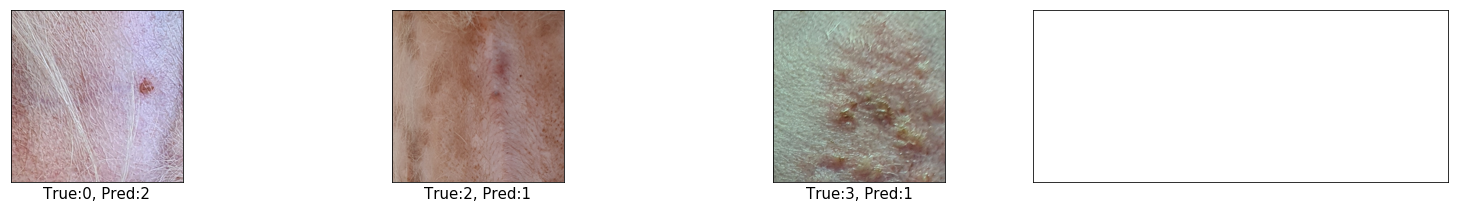

In [64]:
print_errors()